In [1]:
!pip install pytorch_lightning
!pip install pytorch_forecasting
!pip install torchmetrics==0.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 715.6/715.6 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 30.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.4/141.4 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 827.8/827.8 KB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.2/308.2 KB 32.8 MB/s eta 0:

In [ ]:
#import os
#import warnings

#warnings.filterwarnings("ignore")  # avoid printing out absolute paths

#os.chdir("/content/Pytorch_TFT/")

In [ ]:
# !pip install torchmetrics==0.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.6/396.6 kB 3.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: torchmetrics
    Found existing installation: torchmetrics 0.5.0
    Uninstalling torchmetrics-0.5.0:
      Successfully uninstalled torchmetrics-0.5.0


In [2]:
!wget https://raw.githubusercontent.com/TonsonP/Joules_of_Siam/main/Joules_of_Siam_Data%20-%20Dataset_1.csv

--2023-03-28 07:26:43--  https://raw.githubusercontent.com/TonsonP/Joules_of_Siam/main/Joules_of_Siam_Data%20-%20Dataset_1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1490 (1.5K) [text/plain]
Saving to: ‘Joules_of_Siam_Data - Dataset_1.csv’

Joules_of_Siam_Data 100%[===================>]   1.46K  --.-KB/s    in 0s      

2023-03-28 07:26:44 (27.4 MB/s) - ‘Joules_of_Siam_Data - Dataset_1.csv’ saved [1490/1490]



# **Importing librairies**

In [3]:
import copy
from pathlib import Path
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
from pytorch_lightning.loggers import TensorBoardLogger
import torch

from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import SMAPE, PoissonLoss, QuantileLoss
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

In [29]:

data = pd.read_csv("/content/Joules_of_Siam_Data - Dataset_1.csv",encoding = 'unicode_escape',header=0)
#data["year"] = data["Date Time"].dt.year
data.columns.to_list()

#EBitda, OperatingIncome ratio, NetIncome, Net Debt, Dividend Yield, cash per share, gross Profit
data

,Year,Population (Million persons),GDP Chain volume measures (billion baht),Core Consumer Price Index,Trade balance (Billions of USD),Total energry generation,Temperature,Rainfall,Exchange rate,Total_Comsumption
0,2022,66.09,10680.0,103.04,36.8,215824,26.30,2011.9,35.07,197256
1,2021,66.17,10409.9,100.52,32.4,209717,26.91,1759.3,31.98,190468
2,2020,66.19,10246.5,100.29,40.4,206034,27.43,1527.3,31.30,187046
3,2019,66.56,10923.3,100.00,26.7,212050,27.52,1343.4,31.05,192960
4,2018,66.41,10693.2,99.48,22.4,204428,26.92,1660.9,32.31,187832
5,2017,66.19,10259.9,98.78,32.6,201166,26.94,2017.1,33.94,185124
6,2016,65.93,9848.5,98.23,35.8,199654,27.43,1718.1,35.30,182847
7,2015,65.73,9521.4,97.52,26.1,192246,27.31,1419.6,34.25,174833
8,2014,65.12,9232.1,96.50,17.2,186024,26.91,1520.4,32.48,168685
9,2013,64.79,9142.1,94.99,0.0,181205,26.81,1764.4,30.73,164341


# **Build Dataset and train/validation Dataloaders**

In [30]:
data=data.dropna(axis=1)
data.head(20)

,Year,Population (Million persons),GDP Chain volume measures (billion baht),Core Consumer Price Index,Trade balance (Billions of USD),Total energry generation,Temperature,Rainfall,Exchange rate,Total_Comsumption
0,2022,66.09,10680.0,103.04,36.8,215824,26.30,2011.9,35.07,197256
1,2021,66.17,10409.9,100.52,32.4,209717,26.91,1759.3,31.98,190468
2,2020,66.19,10246.5,100.29,40.4,206034,27.43,1527.3,31.30,187046
3,2019,66.56,10923.3,100.00,26.7,212050,27.52,1343.4,31.05,192960
4,2018,66.41,10693.2,99.48,22.4,204428,26.92,1660.9,32.31,187832
5,2017,66.19,10259.9,98.78,32.6,201166,26.94,2017.1,33.94,185124
6,2016,65.93,9848.5,98.23,35.8,199654,27.43,1718.1,35.30,182847
7,2015,65.73,9521.4,97.52,26.1,192246,27.31,1419.6,34.25,174833
8,2014,65.12,9232.1,96.50,17.2,186024,26.91,1520.4,32.48,168685
9,2013,64.79,9142.1,94.99,0.0,181205,26.81,1764.4,30.73,164341


In [31]:
data=data.dropna()
data.head(20)

,Year,Population (Million persons),GDP Chain volume measures (billion baht),Core Consumer Price Index,Trade balance (Billions of USD),Total energry generation,Temperature,Rainfall,Exchange rate,Total_Comsumption
0,2022,66.09,10680.0,103.04,36.8,215824,26.30,2011.9,35.07,197256
1,2021,66.17,10409.9,100.52,32.4,209717,26.91,1759.3,31.98,190468
2,2020,66.19,10246.5,100.29,40.4,206034,27.43,1527.3,31.30,187046
3,2019,66.56,10923.3,100.00,26.7,212050,27.52,1343.4,31.05,192960
4,2018,66.41,10693.2,99.48,22.4,204428,26.92,1660.9,32.31,187832
5,2017,66.19,10259.9,98.78,32.6,201166,26.94,2017.1,33.94,185124
6,2016,65.93,9848.5,98.23,35.8,199654,27.43,1718.1,35.30,182847
7,2015,65.73,9521.4,97.52,26.1,192246,27.31,1419.6,34.25,174833
8,2014,65.12,9232.1,96.50,17.2,186024,26.91,1520.4,32.48,168685
9,2013,64.79,9142.1,94.99,0.0,181205,26.81,1764.4,30.73,164341


In [32]:
data.shape

(21, 10)

In [33]:
data.dtypes

Year                                          int64
Population (Million persons)                float64
GDP Chain volume measures (billion baht)    float64
Core Consumer Price Index                   float64
Trade balance (Billions of USD)             float64
Total energry generation                      int64
Temperature                                 float64
Rainfall                                    float64
Exchange rate                               float64
Total_Comsumption                             int64
dtype: object

In [34]:
# data['dateInt']=data['Year'].astype(str) + data['Month'].astype(str).str.zfill(2)+ data['Day'].astype(str).str.zfill(2)
# data['Date'] = pd.to_datetime(data['dateInt'], format='%Y%m%d')
data['Date'] = pd.to_datetime(data['Year'], format='%Y')

In [35]:
# data=data.drop(['Year','dateInt'], axis=1)
data

,Year,Population (Million persons),GDP Chain volume measures (billion baht),Core Consumer Price Index,Trade balance (Billions of USD),Total energry generation,Temperature,Rainfall,Exchange rate,Total_Comsumption,Date
0,2022,66.09,10680.0,103.04,36.8,215824,26.30,2011.9,35.07,197256,2022-01-01
1,2021,66.17,10409.9,100.52,32.4,209717,26.91,1759.3,31.98,190468,2021-01-01
2,2020,66.19,10246.5,100.29,40.4,206034,27.43,1527.3,31.30,187046,2020-01-01
3,2019,66.56,10923.3,100.00,26.7,212050,27.52,1343.4,31.05,192960,2019-01-01
4,2018,66.41,10693.2,99.48,22.4,204428,26.92,1660.9,32.31,187832,2018-01-01
5,2017,66.19,10259.9,98.78,32.6,201166,26.94,2017.1,33.94,185124,2017-01-01
6,2016,65.93,9848.5,98.23,35.8,199654,27.43,1718.1,35.30,182847,2016-01-01
7,2015,65.73,9521.4,97.52,26.1,192246,27.31,1419.6,34.25,174833,2015-01-01
8,2014,65.12,9232.1,96.50,17.2,186024,26.91,1520.4,32.48,168685,2014-01-01
9,2013,64.79,9142.1,94.99,0.0,181205,26.81,1764.4,30.73,164341,2013-01-01


In [36]:
data["time_idx"] = data.index
data

,Year,Population (Million persons),GDP Chain volume measures (billion baht),Core Consumer Price Index,Trade balance (Billions of USD),Total energry generation,Temperature,Rainfall,Exchange rate,Total_Comsumption,Date,time_idx
0,2022,66.09,10680.0,103.04,36.8,215824,26.30,2011.9,35.07,197256,2022-01-01,0
1,2021,66.17,10409.9,100.52,32.4,209717,26.91,1759.3,31.98,190468,2021-01-01,1
2,2020,66.19,10246.5,100.29,40.4,206034,27.43,1527.3,31.30,187046,2020-01-01,2
3,2019,66.56,10923.3,100.00,26.7,212050,27.52,1343.4,31.05,192960,2019-01-01,3
4,2018,66.41,10693.2,99.48,22.4,204428,26.92,1660.9,32.31,187832,2018-01-01,4
5,2017,66.19,10259.9,98.78,32.6,201166,26.94,2017.1,33.94,185124,2017-01-01,5
6,2016,65.93,9848.5,98.23,35.8,199654,27.43,1718.1,35.30,182847,2016-01-01,6
7,2015,65.73,9521.4,97.52,26.1,192246,27.31,1419.6,34.25,174833,2015-01-01,7
8,2014,65.12,9232.1,96.50,17.2,186024,26.91,1520.4,32.48,168685,2014-01-01,8
9,2013,64.79,9142.1,94.99,0.0,181205,26.81,1764.4,30.73,164341,2013-01-01,9


In [37]:
data.dtypes

Year                                                 int64
Population (Million persons)                       float64
GDP Chain volume measures (billion baht)           float64
Core Consumer Price Index                          float64
Trade balance (Billions of USD)                    float64
Total energry generation                             int64
Temperature                                        float64
Rainfall                                           float64
Exchange rate                                      float64
Total_Comsumption                                    int64
Date                                        datetime64[ns]
time_idx                                             int64
dtype: object

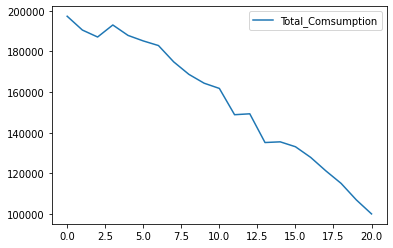

In [38]:
plot_cols = ['Total_Comsumption']
plot_features = data[plot_cols]

_ = plot_features.plot(subplots=True)
plot_features = data[plot_cols][:]

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Year                                      21 non-null     int64         
 1   Population (Million persons)              21 non-null     float64       
 2   GDP Chain volume measures (billion baht)  21 non-null     float64       
 3   Core Consumer Price Index                 21 non-null     float64       
 4   Trade balance (Billions of USD)           21 non-null     float64       
 5   Total energry generation                  21 non-null     int64         
 6   Temperature                               21 non-null     float64       
 7   Rainfall                                  21 non-null     float64       
 8   Exchange rate                             21 non-null     float64       
 9   Total_Comsumption                 

In [26]:
data.tail(20)

,Year,Population (Million persons),GDP Chain volume measures (billion baht),Core Consumer Price Index,Trade balance (Billions of USD),Total energry generation,Temperature,Rainfall,Exchange rate,Total_Comsumption,time_idx
1,2021-01-01,66.17,10409.9,100.52,32.4,209717,26.91,1759.3,31.98,190468,1
2,2020-01-01,66.19,10246.5,100.29,40.4,206034,27.43,1527.3,31.30,187046,2
3,2019-01-01,66.56,10923.3,100.00,26.7,212050,27.52,1343.4,31.05,192960,3
4,2018-01-01,66.41,10693.2,99.48,22.4,204428,26.92,1660.9,32.31,187832,4
5,2017-01-01,66.19,10259.9,98.78,32.6,201166,26.94,2017.1,33.94,185124,5
6,2016-01-01,65.93,9848.5,98.23,35.8,199654,27.43,1718.1,35.30,182847,6
7,2015-01-01,65.73,9521.4,97.52,26.1,192246,27.31,1419.6,34.25,174833,7
8,2014-01-01,65.12,9232.1,96.50,17.2,186024,26.91,1520.4,32.48,168685,8
9,2013-01-01,64.79,9142.1,94.99,0.0,181205,26.81,1764.4,30.73,164341,9
10,2012-01-01,64.46,8902.8,94.05,0.0,179484,27.17,1681.7,31.08,161779,10


In [40]:
data['Time_series_id']='1'

In [50]:
# load data: this is pandas dataframe with at least a column for
# * the target (what you want to predict)
# * the timeseries ID (which should be a unique string to identify each timeseries)
# * the time of the observation (which should be a monotonically increasing integer)
# data = ...

# define the dataset, i.e. add metadata to pandas dataframe for the model to understand it
max_encoder_length = 36
max_prediction_length = 6
#training_cutoff = "2014-11-31"  # day for cutoff
training_cutoff = data["time_idx"].max() - max_prediction_length
training = TimeSeriesDataSet(
    data[lambda x: x.time_idx <= training_cutoff],
    time_idx= "time_idx",  # column name of time of observation
    target= "Total_Comsumption",  # column name of target to predict
    group_ids=["Time_series_id"],  # column name(s) for timeseries IDs
    #max_encoder_length=max_encoder_length,  # how much history to use
    #max_prediction_length=max_prediction_length,  # how far to predict into future
    min_encoder_length=max_encoder_length // 3,  # keep encoder length long (as it is in the validation set)
    max_encoder_length=max_encoder_length,
    # covariates static for a timeseries ID
    #static_categoricals=[Pressure],
    #static_reals,
    # covariates known and unknown in the future to inform prediction
    #time_varying_known_categoricals=["Minute"],
    # time_varying_known_reals=["time_idx", "Month","Day","Hour"],
    time_varying_known_reals=["time_idx"],

    # add_nan=True,
    #time_varying_unknown_categoricals=[ ... ],
    time_varying_unknown_reals=["Total_Comsumption","Exchange rate","Rainfall","Temperature","GDP Chain volume measures (billion baht)","Population (Million persons)"]
    #categorical_encoders={
        #'Month': *pytorch_forecasting.data.encoders.NaNLabelEncoder(add_nan=True)}
)

# create validation dataset using the same normalization techniques as for the training dataset
validation = TimeSeriesDataSet.from_dataset(training, data, min_prediction_idx=training.index.time.max() + 1, stop_randomization=True)

# convert datasets to dataloaders for training
batch_size = 128
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=2)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size, num_workers=2)

# **Build the model**

In [52]:
# create PyTorch Lighning Trainer with early stopping
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-5, patience=10, verbose=False, mode="min")
lr_logger = LearningRateMonitor()

trainer = pl.Trainer(
    max_epochs=50,
    # weights_summary="top",
    # gpus=1,  # run on CPU, if on multiple GPUs, use accelerator="ddp"
    gradient_clip_val=0.1,
    limit_train_batches=30,  # 30 batches per epoch
    callbacks=[lr_logger, early_stop_callback],
    logger=TensorBoardLogger("lightning_logs")
)

# define network to train - the architecture is mostly inferred from the dataset, so that only a few hyperparameters have to be set by the user
tft = TemporalFusionTransformer.from_dataset(
    # dataset
    training,
    # architecture hyperparameters
    hidden_size=32,
    attention_head_size=1,
    dropout=0.1,
    hidden_continuous_size=16,
    # loss metric to optimize
    loss=QuantileLoss(),
    # logging frequency
    log_interval=2,
    # optimizer parameters
    learning_rate=0.04,
    reduce_on_plateau_patience=10
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Number of parameters in network: 72.2k


/usr/local/lib/python3.9/dist-packages/pytorch_lightning/trainer/setup.py:176: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
/usr/local/lib/python3.9/dist-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(
/usr/local/lib/python3.9/dist-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
  rank_zero_warn(


/usr/local/lib/python3.9/dist-packages/pytorch_lightning/trainer/trainer.py:1609: PossibleUserWarning: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(
/usr/local/lib/python3.9/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:488: PossibleUserWarning: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test/predict dataloaders.
  rank_zero_warn(


ValueError: ignored

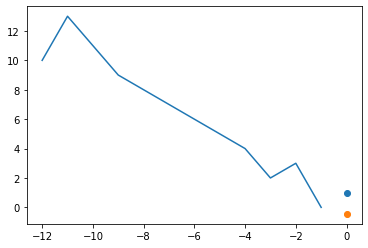

In [54]:
# find optimal learning rate
res = trainer.tuner.lr_find(
     tft,
     train_dataloaders=train_dataloader,
     val_dataloaders=val_dataloader,
     max_lr=30.0,
     min_lr=1e-6,
 )


# res = trainer.tuner.lr_find(
#      tft,
#      train_dataloaders=train_dataloader,
#      val_dataloaders=train_dataloader,
#      max_lr=30.0,
#      min_lr=1e-6,
#  )


print(f"suggested learning rate: {res.suggestion()}")
fig = res.plot(show=True, suggest=True)
fig.show()

# **Training**

In [55]:
# fit the model on the data - redefine the model with the correct learning rate if necessary
trainer.fit(
    tft, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader,
)

NameError: ignored

# **Load the best model**

In [ ]:
# load the best model according to the validation loss
# (given that we use early stopping, this is not necessarily the last epoch)
best_model_path = trainer.checkpoint_callback.best_model_path
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/parsing.py:262: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  f"Attribute {k!r} is an instance of `nn.Module` and is already saved during checkpointing."
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/parsing.py:262: UserWarning: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
  f"Attribute {k!r} is an instance of `nn.Module` and is already saved during checkpointing."


# **Predict**

In [ ]:
# calcualte mean absolute error on validation set
actuals = torch.cat([y[0] for x, y in iter(val_dataloader)])
predictions = best_tft.predict(val_dataloader)

# **Evaluation**

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


MAE = mean_absolute_error(actuals, predictions)
print("MAE = ", MAE)
MSE = mean_squared_error(actuals, predictions)
print("MSE = ", MSE)
R2_Score = r2_score(actuals, predictions, multioutput='variance_weighted')
print("R2_Score = {}%".format(round(R2_Score*100,2)))

MAE =  0.07279362
MSE =  0.008260049
R2_Score = 83.21%


# **Plotting results**

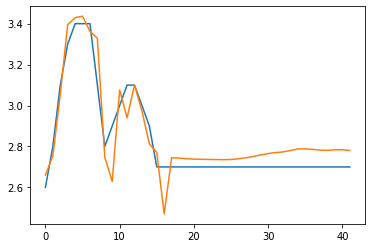

In [ ]:
plt.plot(actuals)
plt.plot(predictions)
plt.show()

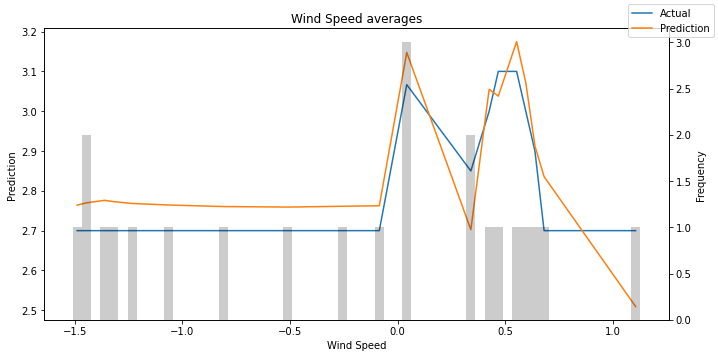

In [ ]:
predictions, x = best_tft.predict(val_dataloader, return_x=True)
predictions_vs_actuals = best_tft.calculate_prediction_actual_by_variable(x, predictions)
best_tft.plot_prediction_actual_by_variable(predictions_vs_actuals,'Wind Speed');